# Global Terrorism- data exploration project

## Aleksandra Graboś

### 24-03-2019

#### Data Import

##### Data was taken from kaggle web page and stores information about terrorists attacks around the world. In example it containes dates, country, city, region information. Import was done from CSV file using pandas library and  ISO-8859-1 encoding. Pandas, numpy, matplotlib, csv are necessary to run the code.

In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = "ISO-8859-1", low_memory=False)

data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### Choosing data for specific countries only

In [24]:
is_France =  data['country_txt']=='France'
data_France = data[is_France]
data_France.head()

is_Spain =  data['country_txt']=='Spain'
data_Spain = data[is_Spain]
data_Spain.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
103,197003030001,1970,3,3,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0,1,0,1,NaN
437,197007280003,1970,7,28,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0,1,0,1,NaN
625,197012010001,1970,12,1,NaN,1,12/24/1970,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
648,197012300001,1970,12,30,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0,1,0,1,NaN
770,197103180001,1971,3,18,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


#### Comparison of terrorists attacks in Spain & France- Where was more attacks in recent years France or Spain and what is the trend?

Text(0, 0.5, 'Count')

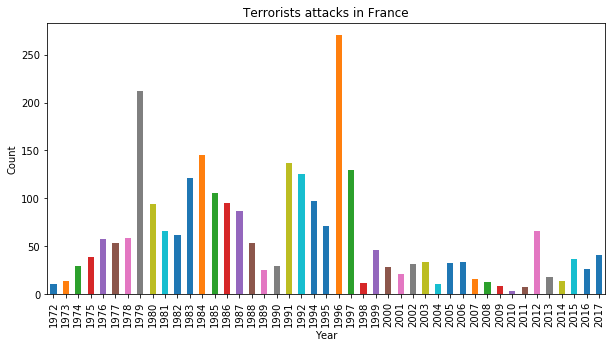

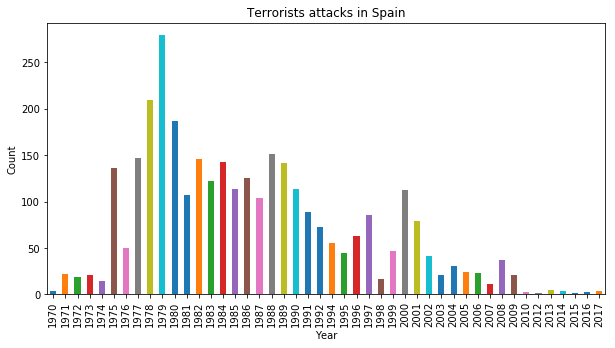

In [25]:
data_France_year_only = data_France[['iyear']]

plt.figure(figsize=(10,5))

graph = data_France_year_only['iyear'].value_counts().sort_index(ascending=True).plot(kind='bar', title= 'Terrorists attacks in France')
graph.set_xlabel("Year")
graph.set_ylabel("Count")

data_Spain_year_only = data_Spain[['iyear']]
data_Spain_year_only.head()

plt.figure(figsize=(10,5))

graph2 = data_Spain_year_only['iyear'].value_counts().sort_index(ascending=True).plot(kind='bar', title= 'Terrorists attacks in Spain')
graph2.set_xlabel("Year")
graph2.set_ylabel("Count")


#### Attacks in USA by states- In which state there was most terrorists attacks?

Text(17.200000000000003, 0.5, 'Count')

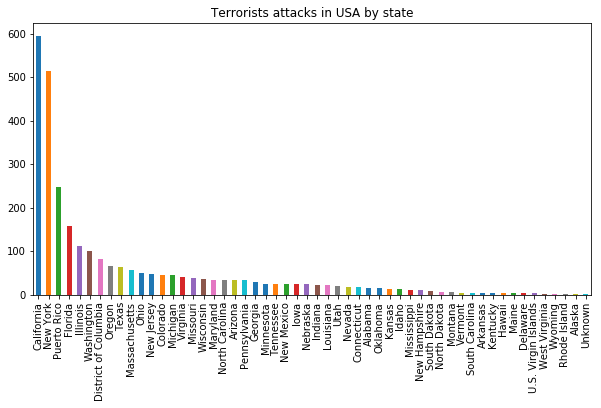

In [27]:
is_USA =  data['country_txt']=='United States'
data_USA = data[is_USA]
data_USA.head()

data_USA_provstate = data_USA[['provstate']]

plt.figure(figsize=(10,5))

graph3 = data_USA_provstate['provstate'].value_counts().plot(kind='bar', title= 'Terrorists attacks in USA by state')
graph.set_xlabel("State")
graph.set_ylabel("Count")

#### Attacks on differents hemispheres- Are the numbers of attacks different on each hemisphere?

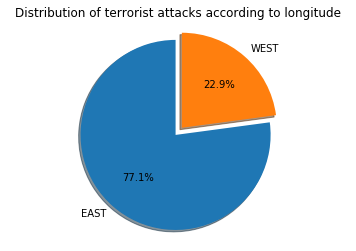

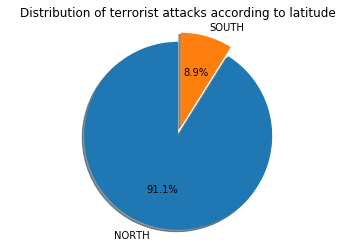

In [73]:
east_hemisphere_index = data['longitude'] >= 0
east_hemisphere = data[east_hemisphere_index]
west_hemisphere_index = data['longitude'] < 0
west_hemisphere = data[west_hemisphere_index]

e_count = east_hemisphere.count()['eventid']
w_count = west_hemisphere.count()['eventid']

labels = 'EAST', 'WEST'
sizes = [e_count, w_count]

explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title("Distribution of terrorist attacks according to longitude")
plt.show()

north_hemisphere_index = data['latitude'] >= 0
north_hemisphere = data[north_hemisphere_index]
south_hemisphere_index = data['latitude'] < 0
south_hemisphere = data[south_hemisphere_index]

n_count = north_hemisphere.count()['eventid']
s_count = south_hemisphere.count()['eventid']

labels2 = 'NORTH', 'SOUTH'
sizes2 = [n_count, s_count]

explode = (0, 0.1)

fig2, ax2 = plt.subplots()
ax2.pie(sizes2, explode=explode, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title("Distribution of terrorist attacks according to latitude")
plt.show()

#### Comparison of attacks in USA & Russia after 1991- Is there significant difference between attacks in Russia and USA after Soviet Union breakdown?

Text(0, 0.5, 'Count')

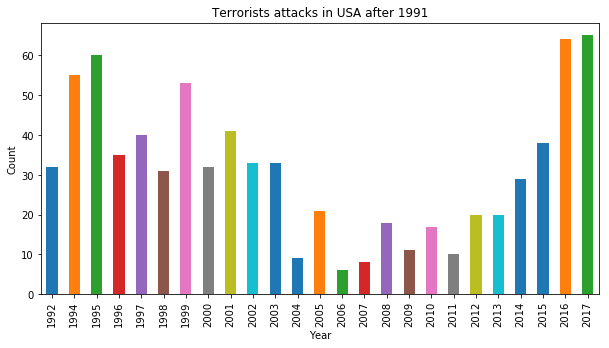

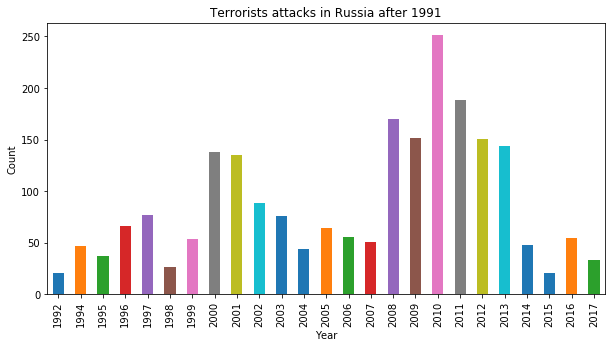

In [3]:
is_USA =  data['country_txt']=='United States'
data_USA = data[is_USA]
is_more_1992 = data_USA['iyear'] >= 1992
data_USA_1992 = data_USA[is_more_1992]
data_USA_1992.head()

is_Russia =  data['country_txt']=='Russia'
data_Russia = data[is_Russia]
is_more_1992 = data_Russia['iyear'] >= 1992
data_Russia_1992 = data_Russia[is_more_1992]


data_USA_1992_year = data_USA_1992[['iyear']]
data_Russia_1992_year = data_Russia_1992[['iyear']]

plt.figure(figsize=(10,5))
graph4 = data_USA_1992_year['iyear'].value_counts().sort_index(ascending=True).plot(kind='bar', title= 'Terrorists attacks in USA after 1991')
graph4.set_xlabel("Year")
graph4.set_ylabel("Count")

plt.figure(figsize=(10,5))
graph5 = data_Russia_1992_year['iyear'].value_counts().sort_index(ascending=True).plot(kind='bar', title= 'Terrorists attacks in Russia after 1991')
graph5.set_xlabel("Year")
graph5.set_ylabel("Count")

